<a href="https://colab.research.google.com/github/jmlDC/MediaBias-Thesis22-23/blob/Trying-Straight-Methods/ScrapingNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEDIA BIAS Thesis

# Setting up Environment

### PIP install

In [15]:
!pip3 install requests-html
!apt update
!apt install chromium-chromedriver
!pip3 install selenium
!pip3 install webdriver-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.5 MB/s 
     |████████████████████████████████| 140 kB 40.0 MB/s 
     |████████████████████████████████| 106 kB 49.3 MB/s 
     |████████████████████████████████| 127 kB 48.4 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24590 sha256=eb7f2e3e2eb16c1d19bbf532f163318206157594ce66b2b6dca9b0f34da04e3f
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [29.9 kB]
Hit:13 http://ppa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.6.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [14]:
# Needed for Selenium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

cp: cannot stat '/usr/lib/chromium-browser/chromedriver': No such file or directory


### Imports

In [13]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [16]:
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

from requests_html import HTMLSession 

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By


/usr/local/lib/python3.7/dist-packages/trio/_core/_multierror.py:411: RuntimeWarning: IPython detected, but you already have a custom exception handler installed. I'll skip installing Trio's custom handler, but this means exception groups will not show full tracebacks.
  category=RuntimeWarning,


### Mounting to GDrive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### dir variable

In [6]:
dir  = "/content/gdrive/MyDrive/THESIS-MS/Truth-Thesis22-23/"

# Scraping

## Extract Source Function

In [18]:
def extract_source(url):
    agent = {"User-Agent":"Chrome/105.0.0.0"}
    try:
      source=requests.get(url, headers=agent)
    except Exception as e:                                   # this describes what to do if an exception is thrown
      error_type, error_obj, error_info = sys.exc_info()      # get the exception information
      print ('ERROR FOR LINK:',url)                          #print the link that cause the problem
      print (error_type, 'Line:', error_info.tb_lineno)     #print error info and line that threw the exception
    
    return source                                               #ignore this page. Abandon this and go back.

## Politifact

In [ ]:
## Politifact 
pagesToGet= 1
upperframe=[]  
site = "politifact"


for page in range(1,pagesToGet+1):
    print('processing page :', page)
    url = 'https://www.politifact.com/factchecks/list/?page='+str(page)
    print(url)
    
    #an exception might be thrown, so the code should be in a try-except block
    try:
        #use the browser to get the url. This is suspicious command that might blow up.
        page=requests.get(url)                             # this might throw an exception if something goes wrong.
    
    except Exception as e:                                   # this describes what to do if an exception is thrown
        error_type, error_obj, error_info = sys.exc_info()      # get the exception information
        print ('ERROR FOR LINK:',url)                          #print the link that cause the problem
        print (error_type, 'Line:', error_info.tb_lineno)     #print error info and line that threw the exception
        continue                                              #ignore this page. Abandon this and go back.

    time.sleep(2)   
    soup=BeautifulSoup(page.text,'html.parser')
    frame=[]
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})
    print(len(links))

    
    filename= f"{dir + site}NEWS.csv"
    f=open(filename,"w", encoding = 'utf-8')
    headers="Statement,Link,Date, Source, Label\n"
    f.write(headers)
    
    for j in links:
        Statement = j.find("div",attrs={'class':'m-statement__quote'}).text.strip()
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        Date = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[-14:-1].strip()
        Source = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs ={'class':'m-statement__content'}).find('img',attrs={'class':'c-image__original'}).get('alt').strip()
        frame.append((Statement,Link,Date,Source,Label))
        f.write(Statement.replace(",","^")+","+Link+","+Date.replace(",","^")+","+Source.replace(",","^")+","+Label.replace(",","^")+"\n")
    upperframe.extend(frame)
f.close()
data=pd.DataFrame(upperframe, columns=['Statement','Link','Date','Source','Label'])
data.head()

processing page : 1
https://www.politifact.com/factchecks/list/?page=1
30


,Statement,Link,Date,Source,Label
0,Photo shows “late-night operatives moving van-...,https://www.politifact.com/factchecks/2022/nov...,"mber 10, 2022",Viral image,false
1,The number of followers John Fetterman and Meh...,https://www.politifact.com/factchecks/2022/nov...,"mber 10, 2022",Instagram posts,pants-fire
2,A “dead man on the ballot” is evidence the Dem...,https://www.politifact.com/factchecks/2022/nov...,"mber 10, 2022",Instagram posts,false
3,Graph shows Gretchen Whitmer stole the Michiga...,https://www.politifact.com/factchecks/2022/nov...,"mber 10, 2022",Instagram posts,pants-fire
4,Map proves the Pennsylvania Senate election wa...,https://www.politifact.com/factchecks/2022/nov...,"mber 10, 2022",Instagram posts,pants-fire


## Manila Bulletin

In [ ]:
## Manila bulletin
pagesToGet= 1
upperframe=[]  
topic = "ukraine war"
site = "manilaBulletin"

data=pd.DataFrame(columns=['Statement','Link','Date',"Topic"])


for page in range(1,pagesToGet+1):
    print('processing page :', page)
    url = 'https://mb.com.ph/page/'+str(page)+'/?s='+topic.replace(" ", "+")
    print(url)

    time.sleep(2)   
    soup=BeautifulSoup(extract_source(url).text, 'html.parser')

    links=soup.find("article", {'class' : 'content-bar col-12 col-lg-12 order-1 col-xl order-xl-2'}).find_all('li',attrs={'class':'article'})
    print(len(links))
    
    filename= f"{dir}{site}-{topic}-NEWS-List.csv"    
    for j in links:
        frame=[]
        try:
          Statement = j.find('h4').find('a').text
          Link = j.find('h4',attrs={'class':'title'}).find('a')['href'].strip()
          Date = j.find('time', {'class': 'time-ago'})['data-time'][0:10].strip()
          frame.extend((Statement, Link, Date, topic))
        except Exception as e:
            pass

        data = data.append(pd.Series(frame, index=data.columns[:len(frame)]), ignore_index=True)
data.to_csv(filename)
data.head()

processing page : 1
https://mb.com.ph/page/1/?s=ukraine+war
16


,Statement,Link,Date,Topic
0,Putin: Russia battling ‘Western domination’ as...,https://mb.com.ph/2022/10/28/putin-russia-batt...,2022-10-28,ukraine war
1,"Pope urges UN reform after Ukraine war, Covid ...",https://mb.com.ph/2022/10/17/pope-urges-un-ref...,2022-10-17,ukraine war
2,"Amid Ukraine war, US flies Russian cosmonaut t...",https://mb.com.ph/2022/10/06/amid-ukraine-war-...,2022-10-06,ukraine war
3,Russia-Ukraine war is ‘a world war’ — Pope Fra...,https://mb.com.ph/2022/09/29/russia-ukraine-wa...,2022-09-29,ukraine war
4,Pope urges end to ‘senseless’ Ukraine war duri...,https://mb.com.ph/2022/09/14/pope-urges-end-to...,2022-09-14,ukraine war


In [ ]:
data2 = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
filename= f"{dir+site+'-'+topic}NEWS.csv"

for index, row in data.iterrows():
  url = row["Link"] 
  print(url)

  time.sleep(1)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')

  head=soup.find("article", {'id' : 'the-article-content'})
  # print(content.prettify())
  textList =soup.find("article", {'id' : 'the-article-content'}).find("section", {'class': 'article-content'}).find_all("p")
  
  
  row=[]
  try:
    Title = head.find('h2',{'class':'title'}).text.strip()
    Author = head.find('p',attrs={'class':'author'}).find('a').text[3:].strip()
    Date = head.find('p', attrs={'class': 'published'}).text[10:-9].strip(",") 
  except Exception as e:
      pass
  
  body = ""
  for t in textList:
    body += (t.text.replace('\u200b', '')) +"\n" 

  row.extend((Title, Author, Date, body))
  

  data2 = data2.append(pd.Series(row, index=data2.columns[:len(row)]), ignore_index=True)
  
data2.to_csv(filename)
data2.head()

https://mb.com.ph/2022/10/28/putin-russia-battling-western-domination-as-ukraine-war-grinds-on/
https://mb.com.ph/2022/10/17/pope-urges-un-reform-after-ukraine-war-covid-limits/
https://mb.com.ph/2022/10/06/amid-ukraine-war-us-flies-russian-cosmonaut-to-iss/
https://mb.com.ph/2022/09/29/russia-ukraine-war-is-a-world-war-pope-francis/
https://mb.com.ph/2022/09/14/pope-urges-end-to-senseless-ukraine-war-during-kazakhstan-visit/
https://mb.com.ph/2022/08/04/gatchalian-seeks-impact-assessment-of-russia-ukraine-war-on-ph/
https://mb.com.ph/2022/08/03/us-sanctions-putin-girlfriend-more-oligarchs-for-complicity-in-ukraine-war/
https://mb.com.ph/2022/07/20/pacquiao-yoo-exhibition-match-to-serve-as-charity-event-for-ukraine-war-victims/
https://mb.com.ph/2022/07/15/ukraine-war-to-dominate-g20-finance-chief-meeting-in-indonesia/
https://mb.com.ph/2022/06/27/ukraine-war-could-boost-illegal-drug-production-un/
https://mb.com.ph/2022/06/09/un-chief-warns-impact-of-ukraine-war-on-world-is-worsening/

,Title,Author,Date,Text
0,Putin: Russia battling ‘Western domination’ as...,Agence-France-Presse,"October 28, 2022","MOSCOW, Russia — President Vladimir Putin said..."
1,"Pope urges UN reform after Ukraine war, Covid ...",Agence-France-Presse,"October 17, 2022","VATICAN CITY, Holy See – Pope Francis said the..."
2,"Amid Ukraine war, US flies Russian cosmonaut t...",Agence-France-Presse,"October 6, 2022",UNITED STATES — A SpaceX rocket carrying a Rus...
3,Russia-Ukraine war is ‘a world war’ — Pope Fra...,Philippine News Agency,"September 29, 2022",\n\nVATICAN CITY – Pope Francis said it is a ...
4,Pope urges end to ‘senseless’ Ukraine war duri...,Agence-France-Presse,"September 14, 2022","NUR SULTAN, Kazakhstan – Pope Francis on Tuesd..."


## ABS CBN

In [ ]:
## ABS CBN
pagesToGet= 2
topic = "Queen Elizabeth Death"
site = "ABS-CBN_NEWS"


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
userAgent = "Chrome/105.0.0.0"
chrome_options.add_argument(f"user-agent={userAgent}")
driver = webdriver.Chrome('chromedriver',options=chrome_options)

data=pd.DataFrame(columns=['Title','Link','Date',"Topic"])

for page in range(1,pagesToGet+1):
  url = 'https://news.abs-cbn.com/special-pages/search?q='+topic.replace(" ", "%20")+'&gsc.sort=&gsc.page='+str(page)+'#gsc.tab=0&gsc.q='+topic.replace(" ", "%20")+'&gsc.sort=&gsc.page='+str(page)
  print(url)

  driver.get(url)
  # WebDriverWait(driver, 30).until(EC.visibility_of_element_located((By.ID, '___gcse_0'))) 
  source = driver.page_source

  time.sleep(2)   
  soup = BeautifulSoup(source, 'html.parser')
  searches = soup.find_all('div', {'class':'gsc-webResult gsc-result'})
  filename= f"{dir}{site}-{topic}-NEWS-List.csv"     

  for x in searches:
    frame=[]
    Title = x.find('div', class_="gs-title").find("a").text.strip()
    Date = x.find('div', class_="gs-bidi-start-align gs-snippet").text[:12].strip()
    Link = x.find('a', class_="gs-title")['href']
    frame.extend((Title, Link, Date, topic))

    data = data.append(pd.Series(frame, index=data.columns[:len(frame)]), ignore_index=True)



data.to_csv(filename)
driver.quit()
data





https://news.abs-cbn.com/special-pages/search?q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=1#gsc.tab=0&gsc.q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=1
https://news.abs-cbn.com/special-pages/search?q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=2#gsc.tab=0&gsc.q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=2


,Title,Link,Date,Topic
0,Queen Elizabeth II died of 'old age': death ce...,https://news.abs-cbn.com/overseas/09/30/22/que...,"Sep 30, 2022",Queen Elizabeth Death
1,Queen Elizabeth II dies at 96 | ABS-CBN News,https://news.abs-cbn.com/overseas/09/09/22/que...,"Sep 9, 2022",Queen Elizabeth Death
2,The death of Queen Elizabeth II: Thursday's ti...,https://news.abs-cbn.com/overseas/09/09/22/the...,"Sep 9, 2022",Queen Elizabeth Death
3,London Bridge: The protocol after Queen Elizab...,https://news.abs-cbn.com/overseas/09/09/22/lon...,"Sep 9, 2022",Queen Elizabeth Death
4,Queen Elizabeth II: Record-breaking monarch | ...,https://news.abs-cbn.com/spotlight/09/09/22/qu...,"Sep 9, 2022",Queen Elizabeth Death
5,Queen Elizabeth II begins solemn final journey...,https://news.abs-cbn.com/overseas/09/11/22/que...,"Sep 11, 2022",Queen Elizabeth Death
6,Sporting world pays tribute to Queen Elizabeth...,https://news.abs-cbn.com/sports/09/09/22/sport...,"Sep 9, 2022",Queen Elizabeth Death
7,"Hong Kongers mourn Queen Elizabeth, and a bygo...",https://news.abs-cbn.com/video/overseas/09/20/...,"Sep 20, 2022",Queen Elizabeth Death
8,Death of Queen Elizabeth II: What happens next...,https://news.abs-cbn.com/spotlight/09/15/22/de...,"Sep 15, 2022",Queen Elizabeth Death
9,Queen's death spells awkward return for Prince...,https://news.abs-cbn.com/spotlight/09/13/22/qu...,"Sep 13, 2022",Queen Elizabeth Death


In [ ]:
data2 = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
filename= f"{dir+site+'-'+topic}NEWS.csv"

for index, row in data.iterrows():
  url = row["Link"] 
  if ('multimedia/photo' in url):
    pass
  else:
    print(url)

    time.sleep(1)   
    soup=BeautifulSoup(extract_source(url).text, 'html.parser')
      
    row=[]
    
    Title = soup.find('h1',{'class':'news-title'}).text.strip()
    Author = soup.find('span',attrs={'class':'editor'}).text.strip()
    Date = soup.find('span', attrs={'class': 'date-posted'}).text[:-8].strip() 
    
    textList =soup.find("div", {'class' :'article-content'}).find_all("p")
    body = ""
    for t in textList:
      if (t.text != "RELATED VIDEO:"):
        body += (t.text) +"\n" 

    row.extend((Title, Author, Date, body))
    

    data2 = data2.append(pd.Series(row, index=data2.columns[:len(row)]), ignore_index=True)
  
data2.to_csv(filename)
data2.head()

https://news.abs-cbn.com/overseas/09/30/22/queen-elizabeth-ii-died-of-old-age-death-certificate
https://news.abs-cbn.com/overseas/09/09/22/queen-elizabeth-ii-dies-at-96
https://news.abs-cbn.com/overseas/09/09/22/the-death-of-queen-elizabeth-ii-thursdays-timeline
https://news.abs-cbn.com/overseas/09/09/22/london-bridge-the-protocol-after-queen-elizabeths-death
https://news.abs-cbn.com/spotlight/09/09/22/queen-elizabeth-ii-record-breaking-monarch
https://news.abs-cbn.com/overseas/09/11/22/queen-elizabeth-ii-begins-solemn-final-journey
https://news.abs-cbn.com/sports/09/09/22/sporting-world-pays-tribute-to-queen-elizabeth-ii
https://news.abs-cbn.com/video/overseas/09/20/22/hong-kongers-mourn-queen-elizabeth-and-a-bygone-age


AttributeError: ignored

## GMA 

In [ ]:
# https://www.gmanetwork.com/news/#/search;query=queen%20elizabeth%20death;sortBy=_score;isDesc=1

topic = "Queen Elizabeth Death"
site = "GMA-Network"


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
userAgent = "Chrome/105.0.0.0"
chrome_options.add_argument(f"user-agent={userAgent}")
driver = webdriver.Chrome('chromedriver',options=chrome_options)

data=pd.DataFrame(columns=['Title','Link','Date',"Topic"])

url = 'https://www.gmanetwork.com/news/#/search;query='+topic.replace(" ", "%20")+';sortBy=_score;isDesc=1'
print(url)

driver.get(url)
WebDriverWait(driver, 50).until(EC.visibility_of_element_located((By.CLASS_NAME, 'clearfix'))) 
source = driver.page_source

time.sleep(2)   
soup = BeautifulSoup(source, 'html.parser')
searches = soup.find_all('div', {'class':'zd-row-text-wrap'})
filename= f"{dir}{site}-{topic}-NEWS-List.csv"     
print(len(searches))

for x in searches:
  frame=[]
  Title = x.find('h4', class_="zd-result-title ng-star-inserted").text.strip()
  Date = x.find('div', class_="zd-result-subTitle ng-star-inserted").text[:-18].strip()
  partialTitle = ' '.join(Title.split()[:8])

  try:
    Link = ""
    to_Click = driver.find_element(By.XPATH, f"//*[contains(text(), '{Title}')]")
    print(to_Click.text)
    to_Click.click()
    driver.switch_to.window(driver.window_handles[1])
    Link = driver.current_url
    driver.close()
    driver.switch_to.window(driver.window_handles[0])
  except Exception as e:
    print("Something wrong. Error:", e.split()[0])

  frame.extend((Title, Link, Date, topic))

  data = data.append(pd.Series(frame, index=data.columns[:len(frame)]), ignore_index=True)

data.to_csv(filename)
driver.quit()
data.head(10)


https://www.gmanetwork.com/news/#/search;query=Queen%20Elizabeth%20Death;sortBy=_score;isDesc=1


KeyboardInterrupt: ignored

In [ ]:
data

In [ ]:
data2 = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
filename= f"{dir+site+'-'+topic}NEWS.csv"

for index, row in data.iterrows():
  url = row["Link"] 
  if (url == ""):
    continue
  
  print(url)
  time.sleep(2)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')
    
  row=[]
  
  Title = soup.find('h1',{'class':'story_links'}).text.strip()
  Author = soup.find('div',attrs={'class':'main-byline'}).find('div').find('div').text.strip()
  Date = soup.find('div', attrs={'class': 'article-time'}).find('time')['datetime'][:10].strip() 
  
  textList =soup.find("div", {'class' :'story_main'}).find_all("p")
  body = ""
  for t in textList:
    if (t.find('p', class_="ad")):
      pass
    else:
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  

  data2 = data2.append(pd.Series(row, index=data2.columns[:len(row)]), ignore_index=True)
  
data2.to_csv(filename)
data2.head()

# EDA

### Function for Representation

#### Imports

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords

In [38]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('vader_lexicon')
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [39]:
# Import other necessary packages
import pickle
from wordcloud import WordCloud

In [40]:
# Set up visualization configurations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,6)})

#### Function

In [41]:
def create_wordcloud(df, col, max_words=100, title=None):    
    # Transform text for WordCloud
    df = df[col]
    df = df.dropna()
    df = ' '.join(df)
    df = df.replace(' ', ',')
    
    # Generate wordcloud image
    wc = WordCloud(
        background_color="white", 
        # colormap='plasma',
        max_words=max_words
    )
    wc.generate(df)
    plt.imshow(wc, interpolation='bilinear')
    if title:
        plt.title(title, size=30)
    plt.axis("off")
    plt.show()
    plt.close()

def text_to_dtm(df):
    vectorizer = CountVectorizer(
        stop_words=stopwords,
        max_features=2000
    )
    dtm = vectorizer.fit_transform(df)
    return dtm, vectorizer

def text_to_ngram(df, n=2):
    vectorizer = CountVectorizer(
        stop_words=stopwords,
        ngram_range=(n, n),
        token_pattern=r'\b\w+\b',
        min_df=1,
        max_features=2000
    )
    ngram = vectorizer.fit_transform(df)
    return ngram, vectorizer

def text_to_tfidf(df, stopwords=stopwords):
    vectorizer = TfidfVectorizer(
        stop_words=stopwords,
        max_features=2000
    )
    tfidf = vectorizer.fit_transform(df)
    pickle.dump(vectorizer, open('tfidf.pk', 'wb'))
    return tfidf, vectorizer


def visualize_frequency(vectors, vectorizer, title=None, rotation=45):
    total = vectors.sum(axis=0)
    frequency = [(w, total[0, i]) for w, i in vectorizer.vocabulary_.items()]
    frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
    frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    ax = sns.barplot(data=frequency.head(30), x='frequency', y='term')
    if title:
        ax.set_title(title)
    plt.xticks(rotation=rotation)
    plt.show()
    plt.close()

def visualize(df, col, title=""):
    dtm, dtm_v = text_to_dtm(df[col])
    bigram, bigram_v = text_to_ngram(df[col], n=2)
    trigram, trigram_v = text_to_ngram(df[col], n=3)
    tfidf, tfidf_v = text_to_tfidf(df[col])

    create_wordcloud(df, col, title='{}'.format(title))
    # visualize_frequency(dtm, dtm_v, title='Term frequency for {}'.format(title), rotation=0)
    # visualize_frequency(bigram, bigram_v, title='Term frequency for {} - Bigram'.format(title), rotation=0)
    # visualize_frequency(trigram, trigram_v, title='Term frequency for {} - Trigram'.format(title), rotation=0)
    visualize_frequency(tfidf, tfidf_v, title='TFIDF for {}'.format(title), rotation=0)
    
   

### Visualization

In [ ]:
ABS_df =  pd.read_csv(f'{dir}ABS-CBN_NEWS-Queen Elizabeth DeathNEWS.csv', index_col=0, header=0)
ABS_df.head()

In [ ]:
ABS_rslt_df = ABS_df[ABS_df['Date'] == "Sep 11 2022"]
ABS_rslt_df.head()

In [ ]:
GMA_df = pd.read_csv(f"{dir}GMA-Network-Queen Elizabeth DeathNEWS.csv", index_col=0, header=0)
GMA_df.head()

In [ ]:
GMA_rslt_df = GMA_df[GMA_df['Date'] == "2022-09-11"]
GMA_rslt_df.head()

In [ ]:
visualize(ABS_rslt_df, "Text")

In [ ]:
visualize(GMA_rslt_df, "Text")

# Text Comparison

## Function

In [6]:
def abs_scrape(url):
  abs_df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])

  time.sleep(1)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')
    
  row=[]
  
  Title = soup.find('h1',{'class':'news-title'}).text.strip()
  Author = soup.find('span',attrs={'class':'editor'}).text.strip()
  Date = soup.find('span', attrs={'class': 'date-posted'}).text[:-8].strip() 
  
  textList =soup.find("div", {'class' :'article-content'}).find_all("p")
  body = ""
  for t in textList:
    if (t.text != "RELATED VIDEO:"):
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  
  abs_df = abs_df.append(pd.Series(row, index=abs_df.columns[:len(row)]), ignore_index=True)
  
  return abs_df

In [7]:
def gma_scrape(url):
  gma_df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
  
  time.sleep(2)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')
    
  row=[]

  Title = soup.find('h1',{'class':'story_links'}).text.strip()
  Author = soup.find('div',attrs={'class':'main-byline'})
  if (Author != None):
    Author = Author.find('div').find('div').text.strip() 
  Date = soup.find('div', attrs={'class': 'article-time'}).find('time')['datetime'][:10].strip() 

  
  textList =soup.find("div", {'class' :'story_main'}).find_all("p")
  body = ""
  for t in textList:
    if (t.find('p', class_="ad")):
      pass
    else:
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  

  gma_df = gma_df.append(pd.Series(row, index=gma_df.columns[:len(row)]), ignore_index=True)

  return gma_df
  


In [8]:
def cnn_scrape(url):

  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  chrome_options.add_argument('--disable-blink-features=AutomationControlled')
  userAgent = "Chrome/105.0.0.0"
  chrome_options.add_argument(f"user-agent={userAgent}")
  driver = webdriver.Chrome('chromedriver',options=chrome_options)

  driver.get(url)
  WebDriverWait(driver, 50).until(EC.visibility_of_element_located((By.CLASS_NAME, 'title'))) 
  source = driver.page_source

  cnn_df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
  
  soup=BeautifulSoup(source, 'html.parser')
  # time.sleep(2)   

  # print(soup)
  row=[]
  
  Title = soup.find('h1',{'class':'title'}).text.strip()
  Author = soup.find('div',attrs={'class':'author-byline'}).find('p').find('a').text.strip()
  Date = soup.find('div', attrs={'class': 'dateLine'}).find('p', {'class': 'dateString no-icon'}).text[10:-11].strip() 
  
  textList =soup.find("div", {'class' :'article-maincontent-p cnn-life-body'}).find_all("p")
  body = ""
  for t in textList:
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  

  cnn_df = cnn_df.append(pd.Series(row, index=cnn_df.columns[:len(row)]), ignore_index=True)

  return cnn_df

In [9]:
def clean(df, text, clean_col , sw = [] ):
    """
    Remove blank texts, replaces text with lower case characters,
    remove special characters, remove other special texts like URLs and Twitter handles, 
    remove leading and trailing whitespaces, and remove stopwords.
    """

    # Remove blank texts
    df[clean_col] = df[text].fillna('')     

    # Transform into lowercase
    df[clean_col] = df[clean_col].str.lower()

    # # Remove non-alphanumeric characters
    df[clean_col] = df[clean_col].str.replace(r'(@[A-Za-z0-9_]+)|([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '')
    
    # # Lemmatize verbs
    # df['cleaned_text'] = df['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'v') for x in row.split()]))

    # # Lemmatize adjectives
    # df['cleaned_text'] = df['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'a') for x in row.split()]))

    # # Lemmatize nouns
    # df['cleaned_text'] = df['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'n') for x in row.split()]))

    # Remove trailing and leading whitespaces
    df[clean_col] = df[clean_col].str.replace(r'^\s+|\s+$', '')

    # # Remove stopwords 
    df[clean_col] = df[clean_col].apply(lambda row: ' '.join([word for word in row.split() if word not in (stopwords + sw)])) 

    return df

In [10]:
def senti_Analysis(df, col, colLabel ):
  sia = SentimentIntensityAnalyzer()
  newcol = {'compoundScore' : [sia.polarity_scores(entry) for entry in col]}
  if (colLabel in df.columns):
      df[colLabel] =  newcol['compoundScore']
  else:
    df.insert(df.shape[1], colLabel, newcol['compoundScore'])
  

## Application

### Scrape

In [ ]:
df_ = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
df_ = df_.append(abs_scrape("https://news.abs-cbn.com/news/09/29/22/ovp-eyes-coconut-palace-as-permanent-home"), ignore_index=True)
df_ = df_.append(gma_scrape("https://www.gmanetwork.com/news/topstories/nation/846433/sara-duterte-ovp-in-talks-with-gsis-for-possible-acquisition-of-coconut-palace/story/"), ignore_index=True)
df_.head()

### Sentimental Analysis

### POS

### Oct 6

In [ ]:
df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
abscbn = abs_scrape('https://news.abs-cbn.com/news/10/04/22/who-funded-marcos-sg-trip-not-relevant-says-bersamin')
gma = gma_scrape('https://www.gmanetwork.com/news/topstories/nation/846954/palace-marcos-performed-job-as-president-in-singapore/story/?just_in')
cnn = cnn_scrape('https://www.cnnphilippines.com/news/2022/10/4/Marcos-entitled-to-private-time-funding-source-irrelevant.html')

df = df.append(abscbn)
df = df.append(gma)
df = df.append(cnn)


In [ ]:
addedFilter = ['executive', 'president', 'trip', 'marcos', 'bersamin']
visualize((clean(abscbn,"Text", "cleanText",addedFilter )), "cleanText", "ABS-CBN")
visualize((clean(gma,"Text", "cleanText",addedFilter)), "cleanText", "GMA")
visualize((clean(cnn,"Text", "cleanText", addedFilter)), "cleanText", "CNN")

In [ ]:
df_clean= clean(df_, 'Text', 'clean_Textbody')
df_clean= clean(df_, 'Title', 'clean_Title')
df_clean["clean_Body_Title"] = df_clean["clean_Title"].str.cat(df_clean["clean_Textbody"], sep = "\n")
df_clean.head()

In [ ]:
def POS(df, dfCol, colLabel):
  POS = []
  for index, row in df.iterrows():
    # print(type(row[dfCol]), row[dfCol])
    tokenized = sent_tokenize(row[dfCol])
    for i in tokenized:
      
      # Word tokenizers is used to find the words
      # and punctuation in a string
      wordsList = nltk.word_tokenize(i)

      wordsList = [w for w in wordsList if not w in stopwords]
  
      #  Using a Tagger. Which is part-of-speech
      # tagger or POS-tagger.
      tagged = nltk.pos_tag(wordsList)
      POS.append(tagged)
    df.loc[index, colLabel] =  POS
    
 

In [ ]:
# https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
POS(df_clean, 'clean_Body_Title', "POS")
df_clean


In [ ]:
df_clean.to_csv(f"{dir}textCompare.csv")

# Method 1: Straight Forward Way 

### Importation

In [35]:
## NER extraction
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

import spacy
from spacy import displacy
from collections import Counter

from nltk.chunk import RegexpParser

from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

In [36]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.0 MB/s 


In [37]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### try

In [16]:
sentence = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'


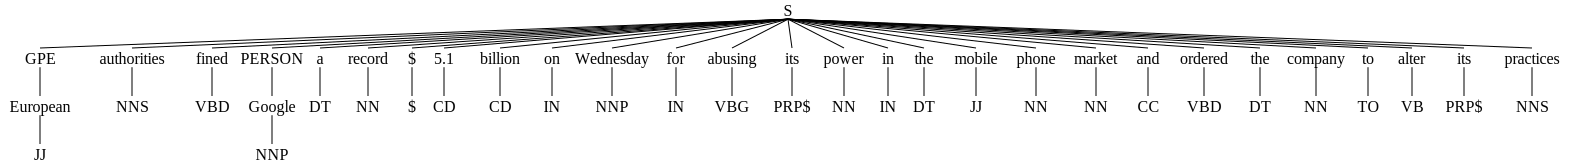

In [17]:
ne_tree = ne_chunk(pos_tag(word_tokenize(sentence)))
ne_tree

In [139]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [19]:
sent = preprocess(sentence)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

In [20]:
pattern = """ CHUNK: {<A>*<P>+} """
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


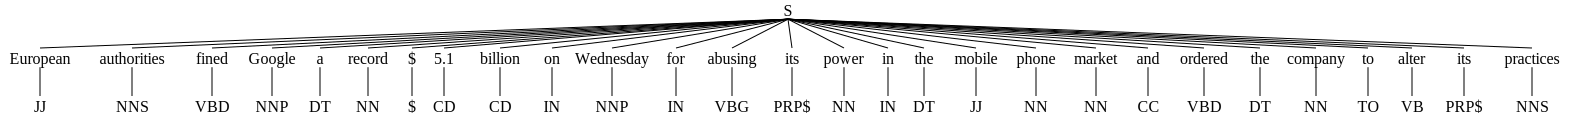

In [21]:
NPChunker = nltk.RegexpParser(pattern) 
result = NPChunker.parse(sent)
result

In [22]:
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'O'),
 ('record', 'NN', 'O'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('mobile', 'JJ', 'O'),
 ('phone', 'NN', 'O'),
 ('market', 'NN', 'O'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'O'),
 ('company', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In [23]:
# Import the SpaCy English model
try:
    nlp = spacy.load("en_core_web_lg")
except:
    nlp = spacy.load("en_core_web_sm")

In [24]:
doc = nlp(sentence)
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [25]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


In [26]:
gma = gma_scrape('https://www.gmanetwork.com/news/topstories/nation/849165/deped-not-in-business-of-erasing-martial-law-facts-says-vp-sara/story/')
gma

,Title,Author,Date,Text
0,DepEd not in business of erasing Martial Law f...,None,2022-10-25,Vice President and Education Secretary Sara D...


In [27]:
article = nlp(gma['Text'].iloc[0])
len(article.ents)

51

In [28]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 22,
         'PERSON': 12,
         'DATE': 4,
         'GPE': 5,
         'WORK_OF_ART': 2,
         'LAW': 2,
         'CARDINAL': 4})

In [29]:
items = [x.text for x in article.ents]
Counter(items).most_common(5)

[('Martial Law', 5),
 ('DepEd', 4),
 ('Education', 2),
 ('Sara Duterte', 1),
 ('Tuesday', 1)]

In [30]:
sentences = [x for x in article.sents]
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

In [31]:
displacy.render(nlp(str(sentences[0])), style='dep', jupyter = True, options = {'distance': 120})


In [32]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[0])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT' and not y.is_space]]

[('Vice', 'PROPN', 'Vice'),
 ('President', 'PROPN', 'President'),
 ('Education', 'PROPN', 'Education'),
 ('Secretary', 'PROPN', 'Secretary'),
 ('Sara', 'PROPN', 'Sara'),
 ('Duterte', 'PROPN', 'Duterte'),
 ('Tuesday', 'PROPN', 'Tuesday'),
 ('refuted', 'VERB', 'refute'),
 ('rebranding', 'ADJ', 'rebranding'),
 ('claims', 'NOUN', 'claim'),
 ('Martial', 'PROPN', 'Martial'),
 ('Law', 'PROPN', 'Law'),
 ('historical', 'ADJ', 'historical'),
 ('records', 'NOUN', 'record'),
 ('schools', 'NOUN', 'school'),
 ('saying', 'VERB', 'say'),
 ('Department', 'PROPN', 'Department'),
 ('Education', 'PROPN', 'Education'),
 ('DepEd', 'PROPN', 'DepEd'),
 ('business', 'NOUN', 'business'),
 ('erasing', 'VERB', 'erase'),
 ('facts', 'NOUN', 'fact')]

In [33]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'Education': 'ORG',
 'Sara Duterte': 'PERSON',
 'Tuesday': 'DATE',
 'Martial Law': 'ORG',
 'the Department of Education (DepEd': 'ORG'}

In [34]:
pprint([(x, x.ent_iob_, x.ent_type_) for x in sentences[0]])

[( , 'O', ''),
 (Vice, 'O', ''),
 (President, 'O', ''),
 (and, 'O', ''),
 (Education, 'B', 'ORG'),
 (Secretary, 'O', ''),
 (Sara, 'B', 'PERSON'),
 (Duterte, 'I', 'PERSON'),
 (on, 'O', ''),
 (Tuesday, 'B', 'DATE'),
 (refuted, 'O', ''),
 (rebranding, 'O', ''),
 (claims, 'O', ''),
 (of, 'O', ''),
 (Martial, 'B', 'ORG'),
 (Law, 'I', 'ORG'),
 (historical, 'O', ''),
 (records, 'O', ''),
 (in, 'O', ''),
 (schools, 'O', ''),
 (,, 'O', ''),
 (saying, 'O', ''),
 (the, 'B', 'ORG'),
 (Department, 'I', 'ORG'),
 (of, 'I', 'ORG'),
 (Education, 'I', 'ORG'),
 ((, 'I', 'ORG'),
 (DepEd, 'I', 'ORG'),
 (), 'O', ''),
 (", 'O', ''),
 (is, 'O', ''),
 (not, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (business, 'O', ''),
 (of, 'O', ''),
 (erasing, 'O', ''),
 (these, 'O', ''),
 (facts, 'O', ''),
 (., 'O', '')]


In [35]:
displacy.render(article, jupyter=True, style='ent')

In [ ]:
import spacy
import re

seen = set() # keep track of covered words

doc = nlp(gma['Text'].iloc[0])

chunks = []
for sent in doc.sents:
    heads = [cc for cc in sent.root.children if cc.dep_ == 'conj']

    for head in heads:
        words = [ww for ww in head.subtree]
        for word in words:
            seen.add(word)
        chunk = (' '.join([ww.text for ww in words]))
        chunks.append( (head.i, chunk) )

    unseen = [ww for ww in sent if ww not in seen]
    chunk = ' '.join([ww.text for ww in unseen])
    chunks.append( (sent.root.i, chunk) )

chunks = sorted(chunks, key=lambda x: x[0])


output_dict = {}

for np in doc.noun_chunks:
    insensitive_the = re.compile(re.escape('the '), re.IGNORECASE)
    new_np = insensitive_the.sub('',np.text)
    output_dict[new_np]=''

for ii, chunk in chunks:
    #print(ii, chunk)
    for key in output_dict:
        if key in chunk:
            output_dict[key]=chunk

pprint(output_dict)

## Cleaning


In [121]:
!pip install textacy
!pip install vaderSentiment

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('sentiwordnet')
nltk.download('brown')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [113]:
# Import EDA, TM, and NLP libraries

import nltk, spacy, textacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spacy import displacy
from spacy.tokens import Doc
from textacy.preprocessing import replace, remove
from textacy.representations.vectorizers import Vectorizer

from nltk.corpus import brown, stopwords
from nltk import ConditionalFreqDist

stopwords = stopwords.words('english')
wnl = WordNetLemmatizer()

# Import the SpaCy English model
try:
    nlp = spacy.load("en_core_web_lg")
except:
    nlp = spacy.load("en_core_web_sm")

nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [107]:
# Define functions to clean and "superclean" texts. Texts processed by clean_texts() will be used for context-aware
# analyses, while those processed by superclean_texts() will be used for word-level analyses
def clean_texts(df, target_column):
  df['cleaned_text'] = df[target_column].fillna('') # Remove blank texts
  df['cleaned_text'] = df['cleaned_text'].str.replace(r'(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|(\w+:\/\/\S+)', '', regex=True) # Remove handles and hashtags
  df['cleaned_text'] = df['cleaned_text'].apply(str).str.replace(r'\t+|\n+|\r+', '', regex=True)  # Remove escape characters
  df['cleaned_text'] = df['cleaned_text'].str.replace(r'^\s+|\s+$', '')  # Remove trailing and leading whitespaces
  return df

def superclean_texts(df, target_column):
  df['supercleaned_text'] = df[target_column]  #.str.lower() # Transform into lowercase
  df['supercleaned_text'] = df['supercleaned_text'].str.replace(r'([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '') # Remove non-alphanumeric characters
  df['supercleaned_text'] = df['supercleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stopwords)])) # Remove stopwords
  # df['supercleaned_text'] = df['supercleaned_text'].apply(lambda x: ' '.join(w for w in nltk.wordpunct_tokenize(x) if w in words ))  #removing non-english words
  df['supercleaned_text'] = df['supercleaned_text'].apply(lambda x: ' '.join([wnl.lemmatize(w) for w in x.split()])) # Lemmatize remaining words
  return df

def preprocess_texts(df, target_column):
  df = clean_texts(df, target_column)
  df = superclean_texts(df, 'cleaned_text')
  return df

In [108]:
gma = gma_scrape('https://www.gmanetwork.com/news/topstories/nation/849165/deped-not-in-business-of-erasing-martial-law-facts-says-vp-sara/story/')
gma

,Title,Author,Date,Text
0,DepEd not in business of erasing Martial Law f...,None,2022-10-25,Vice President and Education Secretary Sara D...


In [109]:
gma = preprocess_texts(gma, 'Text')
gma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


,Title,Author,Date,Text,cleaned_text,supercleaned_text
0,DepEd not in business of erasing Martial Law f...,None,2022-10-25,Vice President and Education Secretary Sara D...,Vice President and Education Secretary Sara Du...,Vice President Education Secretary Sara Dutert...


## NER Extraction

In [110]:
doc = nlp(gma['cleaned_text'].iloc[0])
pprint([(X.text, X.label_) for X in doc.ents])

[('Education', 'ORG'),
 ('Sara Duterte', 'PERSON'),
 ('Tuesday', 'DATE'),
 ('Martial Law', 'ORG'),
 ('the Department of Education (DepEd', 'ORG'),
 ('Duterte', 'ORG'),
 ('Martial Law', 'ORG'),
 ('the Yellow Friday Movement', 'ORG'),
 ('Soledad Duterte', 'PERSON'),
 ('Davao City', 'GPE'),
 ('New Society', 'ORG'),
 ('Bagong Lipunan', 'PERSON'),
 ('Martial Law', 'ORG'),
 ('DepEd', 'ORG'),
 ('2000', 'DATE'),
 ('[The] DepEd', 'WORK_OF_ART'),
 ('Bilang Education', 'ORG'),
 ('wala po sa', 'PERSON'),
 ('pagsira sa', 'PERSON'),
 ('Education', 'ORG'),
 ('Department of Education', 'ORG'),
 ('kasalukuyang abala sa mga programang', 'PERSON'),
 ('naglalayong maiangat', 'PERSON'),
 ('Pilipinas', 'GPE'),
 ('para sa', 'ORG'),
 ('iginigiit', 'GPE'),
 ('The Department of Education', 'ORG'),
 ('Philippines', 'GPE'),
 ('Martial Law', 'ORG'),
 ('DepEd', 'ORG'),
 ('Rodrigo Duterte', 'PERSON'),
 ('DepEd', 'ORG'),
 ('the Martial Law years', 'LAW'),
 ('Monday', 'DATE'),
 ('Risa Hontiveros', 'PERSON'),
 ('one', 

In [115]:
article = gma['supercleaned_text'].iloc[0]
doc = nlp(article)
pprint([(X.text, X.label_) for X in doc.ents])

[('Education', 'ORG'),
 ('Sara Duterte', 'PERSON'),
 ('Tuesday', 'DATE'),
 ('Martial Law', 'PRODUCT'),
 ('Department Education DepEd', 'ORG'),
 ('Duterte', 'GPE'),
 ('Martial Law EDSA Revolution', 'ORG'),
 ('Yellow Friday Movement', 'ORG'),
 ('Soledad', 'PERSON'),
 ('DepEd', 'PERSON'),
 ('2000', 'DATE'),
 ('DepEd', 'PERSON'),
 ('Duterte', 'ORG'),
 ('Bilang Education', 'PERSON'),
 ('wala po sa', 'PERSON'),
 ('pagsira sa', 'PERSON'),
 ('kasaysayan', 'PERSON'),
 ('Education', 'ORG'),
 ('Ang Department Education', 'ORG'),
 ('kasalukuyang abala sa mga programang', 'ORG'),
 ('naglalayong maiangat', 'PERSON'),
 ('Pilipinas', 'GPE'),
 ('para sa', 'ORG'),
 ('iginigiit', 'GPE'),
 ('ilang mga antiMarcos', 'PERSON'),
 ('The Department Education', 'ORG'),
 ('Philippines', 'GPE'),
 ('Duterte', 'PERSON'),
 ('Martial Law', 'ORG'),
 ('Rodrigo Duterte', 'PERSON'),
 ('DepEd', 'PERSON'),
 ('Martial Law year', 'ORG'),
 ('Monday', 'DATE'),
 ('Risa Hontiveros', 'PERSON'),
 ('Martial Law', 'ORG'),
 ('Marcos',

## Word Association 

In [194]:
_cfd = ConditionalFreqDist()

def is_noun(tag):
  return tag.lower() in ['nn','nns','nn$','nn-tl','nn+bez', 'nn+hvz', 'nns$','np','np$', 'nnp','np+bez','nps', 'nps$','nr','np-tl', 'nrs','nr$']

for sentence in brown.tagged_sents():
  for (index, tagtuple) in enumerate(sentence):
    (token, tag) = tagtuple
    token = token.lower()
    if token not in stopwords and is_noun(tag):
      window = sentence[index+1:index+5]
      for (window_token, window_tag) in window:
        window_token = window_token.lower()
        if window_token not in stopwords and is_noun(window_tag):
          _cfd[token][window_token] += 1

In [189]:
_cfd['road']

FreqDist({'block': 6, 'miles': 3, 'trail': 3, 'trips': 2, 'south': 2, 'maintenance': 2, 'maps': 2, 'system': 2, 'horse': 2, 'town': 2, ...})

In [195]:
def pos_process(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [196]:
cfd = ConditionalFreqDist()
for sentence in gma['cleaned_text'].iloc[0].split('.'):
  ps = pos_process(sentence)
  print(ps)
  for (index, tagtuple) in enumerate(ps):
    (token, tag) = tagtuple
    # token = token.lower()
    if token not in stopwords and is_noun(tag) :
      window = ps[index+1:index+5]
      for (window_token, window_tag) in window:
        window_token = window_token.lower()
        if window_token not in stopwords :
          cfd[token][window_token] += 1
  

[('Vice', 'NNP'), ('President', 'NNP'), ('and', 'CC'), ('Education', 'NNP'), ('Secretary', 'NNP'), ('Sara', 'NNP'), ('Duterte', 'NNP'), ('on', 'IN'), ('Tuesday', 'NNP'), ('refuted', 'VBD'), ('rebranding', 'VBG'), ('claims', 'NNS'), ('of', 'IN'), ('Martial', 'NNP'), ('Law', 'NNP'), ('historical', 'JJ'), ('records', 'NNS'), ('in', 'IN'), ('schools', 'NNS'), (',', ','), ('saying', 'VBG'), ('the', 'DT'), ('Department', 'NNP'), ('of', 'IN'), ('Education', 'NNP'), ('(', '('), ('DepEd', 'NNP'), (')', ')'), ('``', '``'), ('is', 'VBZ'), ('not', 'RB'), ('in', 'IN'), ('the', 'DT'), ('business', 'NN'), ('of', 'IN'), ('erasing', 'VBG'), ('these', 'DT'), ('facts', 'NNS')]
[('``', '``'), ('In', 'IN'), ('a', 'DT'), ('statement', 'NN'), (',', ','), ('Duterte', 'NNP'), ('stressed', 'VBD'), ('that', 'IN'), ('she', 'PRP'), ('knows', 'VBZ'), ('the', 'DT'), ('importance', 'NN'), ('of', 'IN'), ('Martial', 'NNP'), ('Law', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('EDSA', 'NNP'), ('Revolution', 'NNP'), ('in', 'IN

In [209]:
cfd['Sara']

FreqDist({'duterte': 1, 'tuesday': 1, 'refuted': 1})

In [213]:
for X in doc.ents:
  for name in X.text.split():
    for item in cfd[name]:
      pprint([name, X.label_, item])

['Education', 'ORG', 'secretary']
['Education', 'ORG', '—']
['Education', 'ORG', '(']
['Education', 'ORG', ')']
['Education', 'ORG', ',']
['Education', 'ORG', 'sara']
['Education', 'ORG', 'duterte']
['Education', 'ORG', 'deped']
['Education', 'ORG', '``']
['Education', 'ORG', 'wala']
['Education', 'ORG', 'po']
['Education', 'ORG', 'na']
['Education', 'ORG', 'kasalukuyang']
['Education', 'ORG', 'abala']
['Education', 'ORG', 'currently']
['Education', 'ORG', 'ched']
['Sara', 'PERSON', 'duterte']
['Sara', 'PERSON', 'tuesday']
['Sara', 'PERSON', 'refuted']
['Duterte', 'PERSON', 'tuesday']
['Duterte', 'PERSON', 'refuted']
['Duterte', 'PERSON', 'rebranding']
['Duterte', 'PERSON', 'stressed']
['Duterte', 'PERSON', 'knows']
['Duterte', 'PERSON', ',']
['Duterte', 'PERSON', 'davao']
['Duterte', 'PERSON', 'city']
['Duterte', 'PERSON', 'said']
['Duterte', 'PERSON', 'called']
['Duterte', 'PERSON', 'made']
['Duterte', 'PERSON', 'statement']
['Tuesday', 'DATE', 'refuted']
['Tuesday', 'DATE', 'rebrand

SyntaxError: ignored

## POS tagging of Word Assoc

## Mapping to BIAS